# Road to Reality Chapter 20

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Euler Lagrange Equations
$\frac{\partial L}{\partial q_i} = \frac{d}{dt} \frac{{\partial L}}{{\partial \dot{q_i}}}$

where $L = T - V$

### Problem 20.1
For a single particle, $T = \frac{1}{2}mv^2 = \frac{m}{2}(\dot{x}^2 + \dot{y}^2 + \dot{z}^2)$

The potential is 0 in the x and y directions, and $mgz$ in the z direction so

$L = \frac{m}{2}(\dot{x}^2 + \dot{y}^2 + \dot{z}^2) -mgz$

To obtain the parabolic motion, it suffices to solve on a plane perpendicular to the earth, say the x direction.

The EL equation in the x direction yields

$\frac{\partial L}{\partial x} = 0 → m\ddot{x} 0 → v = v_x(0)$

In the z-direction the EL equation yields
$ m\ddot{z} = -mg \rightarrow \ddot{z} = -g$

The system can be solved to produce a parabola in the x-z plane.

## Solution for a projectile with initial velocity

$
\dot{v_x} = 0\\
\dot{v_z} = -gz
$

m := mass

g := Gravitational acceleration near earth

In [1]:
g = 9.81  # Acceleration due to gravity (m/s^2)

def exact_solution(v0, phi):
    """
    :param v0: initial velocity magnitude
    :param phi: initial angle
    :return: 
    """
    impact_time = 2 * v0 * np.sin(phi) / g
    t = np.linspace(0, impact_time, 1000)
    x = v0 * np.cos(phi) * t
    z = v0 * np.sin(phi) * t - (g * t ** 2) / 2
    return x, z


Text(0.5, 1.0, 'Projectile with no air resistance')

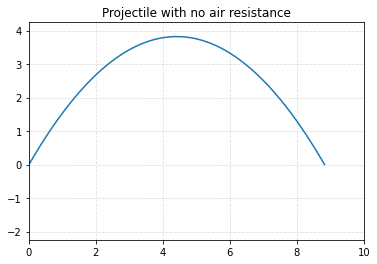

In [10]:
x, z = exact_solution(10, np.pi/3)
plt.plot(x,z)
plt.grid(alpha=.4, linestyle='--')
plt.axis('equal')
plt.xlim(0, 10)
plt.ylim(0, 2)
plt.title('Projectile with no air resistance')

### Problem 20.2
If $S = dp∧ dq$ why is $dS = 0$

### Solution
$ dS = d(dp∧ dq) = d^2p∧ dq + dp ∧ d^2p = 0$ because $d^2 = 0 $


## Hamilton equations

Define $p_i := \frac{\partial L}{\partial q_i}$ (H1)

Define $H := \dot{q^i}\frac{\partial L}{\partial \dot{q_i}} - L$ (H2)

Then

$\frac{dp_i}{dt} = -\frac{\partial{H}}{\partial q^i}, \frac{dq^i}{dt} = -\frac{\partial{H}}{\partial p_i}$

### Problem 20.3
Explain why a vector fields on $T^*(C)$ given by

$$
\frac{\partial{H}}{\partial p_i}\frac{\partial}{\partial q^i} - \frac{\partial{H}}{\partial q^i}\frac{\partial}{\partial p_i}
$$

#### Intuition 
The configuraton space C is the space of (generalized) positions. It is an N-dimensional manifold. Each tangent space T(p) is also an N-dimensional manifold. 
The Tanget Bundle is $T(C) = CxT$ which makes it a 2N-dimenstional manifold,
consequently so is $T^*(C)$.

The "velocity" at every point of $T^*(C)$ is given by 
$\dot{q}^a\frac{\partial}{\partial q^a} + \dot{p}_a\frac{\partial}{\partial p_a}$
and the answer follows from Hamilton's equations.

### Problem 20.4

Using (H1) we find that the definition of p coincides with the "normal" definition $p_i = \frac{\dot{x^i}}{2m}$.
Using (H2) we can simply obtain H from L:

$ H = \sum \dot{x}^i x^i- L = \sum (x^i)^2 - 1/2 \sum \dot{x^i}^2 + mgz = \sum \frac{p_i^2}{2m} + mgz$

### Problem 20.5
Explain why $\omega/2\pi$ is the frequency. Why the graph looks like a sine curve. Why is it the general solution?

### Solution
$$
q = acos(\omega t) + b\sin(\omega t)\\
\dot{q} = a\omega\cos(\omega t) + b\omega\sin(\omega t)\\
\ddot{q} = -a\omega^2\sin(\omega t) - b\omega^2\cos(\omega t)\\
\rightarrow \ddot{q} = -\omega^2 q\\
$$

$\omega2\pi$ is the frequency because $cos(2πn \frac{\omega}{2\pi}) = cos(\frac{\omega}{2\pi})$

### Problem 20.6
Derive the full equation for a pendulum

TODO

### Problem 20.7
Explain why for a stable equilibrium, $q^i = 0$ represents a local minumum of the potential energy.

#### Explanation
The potential energy is proportional to position and not negative (in this problem). Therefore 0 is a local minimum.


### Problem 20.8
$ H = constant + \frac{1}{2}Q_{ab}q^a q^b + \frac{1}{2}P^{ab}p_a p_b$

#### Explanation
At any extremum  (including unstable) we have $\nabla H = 0$, which is why linear terms vanish in all cases.
For a local minimum Q and P are proportional to $\nabla^2 H$ which is positive definite and symmetric.

### Problem 20.9 
Prove that the product of positive definite (PD) matrices has positive eigenvalues. 
Hint: Show that the inverse of a PD matrix is PD.

#### Solution

To prove that the inverse of PD is PD, diagonalize the matrix, invert it, and put it back together. (details need to be worked out)

Let $l$ be an eigenvalue of W with eignenvector v. Then

$$
Wv = lv \rightarrow\\
PQv = lv \rightarrow\\
Qv = lP^{-1}v \rightarrow\\
v^T Qv = l v^T P^{-1}v \rightarrow\\
l = \frac{v^T Qv}{v^T P^{-1}v }
$$

where both the numerator and denominator are positive because of the PD property of P and Q

### Problem 20.12
Let $q_1,q_2$ be eigenvectors of W corresponding to distinct eigenvalues $\omega_1, \omega_2$. Show that 
$q_1^TQq_2 = 0$

#### Solution
Because Q is symmetric we have $q_1^TQq_2 = q_2^TQq_1$.

Now,
$$q_1^T Q q_2 = q_1^T P^{-1}Wq_2 = \omega_2 q_1^T P^{-1}q_2$$

whereas

$$q_2^T Q q_1 = q_2^T P^{-1}Wq_1 = \omega_1 q_2^T P^{-1}q_1$$

But since P is symmetri, $q_1^T P^{-1}q_2 = q_2^T P^{-1}q_1$

which would imply $\omega_1 = \omega_2$ unless $q_1^T Q q_2 = 0$.

### Problem 20.17
If L is independent of generalized positions q, then p is constant in time.

#### Solution
$\frac{\partial L}{\partial q_i} = \frac{d}{dt} \frac{{\partial L}}{{\partial \dot{q_i}}}$
where $\frac{\partial L}{\partial q_i} = 0$ and $\frac{{\partial L}}{{\partial \dot{q_i}}} = p_i$

Therefore $\dot{p_i} = 0$